<a href="https://colab.research.google.com/github/alma3003/final/blob/main/Alma_Meirkhanova_BDA_2105_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing the new version of matplotlib 

In [88]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import libraries

In [89]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.manifold import TSNE
import plotly.express as px 

matplotlib: 3.7.0


#Import the dataset from PC that i already install from kaggle

In [90]:
from google.colab import files
files.upload()

Saving Apr28_2021.csv to Apr28_2021 (3).csv


{'Apr28_2021.csv': b'Name,Latest Chapter,Dated Released,depth,download_timeout,download_slot,download_latency,Link,Genre,Status,Rating,img-link\r\nVampire Chef,Chapter 79,"Apr 28,21",2,180.0,manganelo.com,0.36571359634399414,https://manganelo.com/manga/sg920868,"Romance,Shoujo,Webtoons",Ongoing,4.4,https://avt.mkklcdnv6temp.com/34/s/19-1583500455.jpg\r\nPart Time Boyfriend,Chapter 1 : Prologue,"Apr 28,21",2,180.0,manganelo.com,0.45769691467285156,https://manganelo.com/manga/vn926396,"Comedy,Drama,Harem,Romance",Ongoing,4.26,https://avt.mkklcdnv6temp.com/6/n/24-1618846160.jpg\r\nNingen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,"Apr 28,21",2,180.0,manganelo.com,0.5007622241973877,https://manganelo.com/manga/op918407,"Fantasy,Romance",Ongoing,4.76,https://avt.mkklcdnv6temp.com/44/s/17-1583496873.jpg\r\nDrop-Dead Beauty,Chapter 144,"Apr 28,21",2,180.0,manganelo.com,0.4960520267486572,https://manganelo.com/manga/bx924817,"Drama,Fantasy,Historical,Romance,Shoujo,Webtoons",Ongoing,4.

In [91]:
df=pd.read_csv('Apr28_2021.csv',encoding='unicode_escape',error_bad_lines=False)

#Some basic notions about DATASET

In [92]:
df.head()

Name        Latest Chapter  \
0                                    Vampire Chef            Chapter 79   
1                             Part Time Boyfriend  Chapter 1 : Prologue   
2  Ningen Desuga Maou Totsugu Koto Ni Narimashita            Chapter 66   
3                                Drop-Dead Beauty           Chapter 144   
4                A Thousand Tricks Of Hunting You             Chapter 5   

  Dated Released  depth  download_timeout  download_slot  download_latency  \
0      Apr 28,21      2             180.0  manganelo.com          0.365714   
1      Apr 28,21      2             180.0  manganelo.com          0.457697   
2      Apr 28,21      2             180.0  manganelo.com          0.500762   
3      Apr 28,21      2             180.0  manganelo.com          0.496052   
4      Apr 28,21      2             180.0  manganelo.com          0.516886   

                                   Link  \
0  https://manganelo.com/manga/sg920868   
1  https://manganelo.com/manga/vn926396   
2  https://manganelo.com/manga/op918407   
3  https://manganelo.com/manga/bx924817   
4  https://manganelo.com/manga/gr926451   

                                              Genre   Status  Rating  \
0                           Romance,Shoujo,Webtoons  Ongoing    4.40   
1                        Comedy,Drama,Harem,Romance  Ongoing    4.26   
2                                   Fantasy,Romance  Ongoing    4.76   
3  Drama,Fantasy,Historical,Romance,Shoujo,Webtoons  Ongoing    4.51   
4                              Drama,Romance,Shoujo  Ongoing    4.47   

                                            img-link  
0  https://avt.mkklcdnv6temp.com/34/s/19-15835004...  
1  https://avt.mkklcdnv6temp.com/6/n/24-161884616...  
2  https://avt.mkklcdnv6temp.com/44/s/17-15834968...  
3  https://avt.mkklcdnv6temp.com/41/n/22-16067508...  
4  https://avt.mkklcdnv6temp.com/8/u/24-161940632...

In [93]:
df.shape

(14819, 12)

#Summary of Manga dataset

In [94]:
print(f"Informations About Manga Dataset :\n")
print(df.info())

Informations About Manga Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14819 entries, 0 to 14818
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              14819 non-null  object 
 1   Latest Chapter    14819 non-null  object 
 2   Dated Released    14819 non-null  object 
 3   depth             14819 non-null  int64  
 4   download_timeout  14819 non-null  float64
 5   download_slot     14819 non-null  object 
 6   download_latency  14819 non-null  float64
 7   Link              14819 non-null  object 
 8   Genre             14643 non-null  object 
 9   Status            14710 non-null  object 
 10  Rating            14819 non-null  float64
 11  img-link          14819 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB
None


In [95]:
print(f"Summary of The Manga Dataset :")
df.describe()

Summary of The Manga Dataset :


depth  download_timeout  download_latency        Rating
count  14819.000000           14819.0      14819.000000  1.481900e+04
mean     310.252311             180.0          0.344454  3.199056e+02
std      178.270372               0.0          0.094264  4.144183e+04
min        2.000000             180.0          0.242559 -1.851275e+06
25%      156.000000             180.0          0.298468  4.480000e+00
50%      310.000000             180.0          0.321586  4.720000e+00
75%      465.000000             180.0          0.358074  4.970000e+00
max      619.000000             180.0          2.257657  4.480291e+06

In [96]:
df.describe(include=object)

Name Latest Chapter Dated Released  download_slot  \
count   14819          14819          14819          14819   
unique  14786           7620           1200              1   
top      The       Chapter 1      Jan 20,16  manganelo.com   
freq       23            291           4428          14819   

                                        Link  Genre   Status  \
count                                  14819  14643    14710   
unique                                 14819   6677       29   
top     https://manganelo.com/manga/sg920868   Yaoi  Ongoing   
freq                                       1    255     9672   

                                                 img-link  
count                                               14819  
unique                                              14817  
top     https://avt.mkklcdnv6temp.com/44/h/5-158347362...  
freq                                                    2

In [97]:
print("Null Values of Manga Dataset :")
df.isna().sum().to_frame().T

Null Values of Manga Dataset :


Name  Latest Chapter  Dated Released  depth  download_timeout  \
0     0               0               0      0                 0   

   download_slot  download_latency  Link  Genre  Status  Rating  img-link  
0              0                 0     0    176     109       0         0

#Dropping the null values and duplicates from manga dataset

In [98]:
print("Dropiing the null values")
df.dropna(axis = 0, inplace = True)
df.isna().sum().to_frame().T

Dropiing the null values


Name  Latest Chapter  Dated Released  depth  download_timeout  \
0     0               0               0      0                 0   

   download_slot  download_latency  Link  Genre  Status  Rating  img-link  
0              0                 0     0      0       0       0         0

In [99]:
manga_duplicate = df[df.duplicated()].shape[0]
print(f"There are {manga_duplicate} duplicate entries among {df.shape[0]} entries in manga dataset.")

There are 0 duplicate entries among 14534 entries in manga dataset.


#Custom Palette For Visualization

In [100]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

#Creating the Top 10 mangas from dataset by RATING

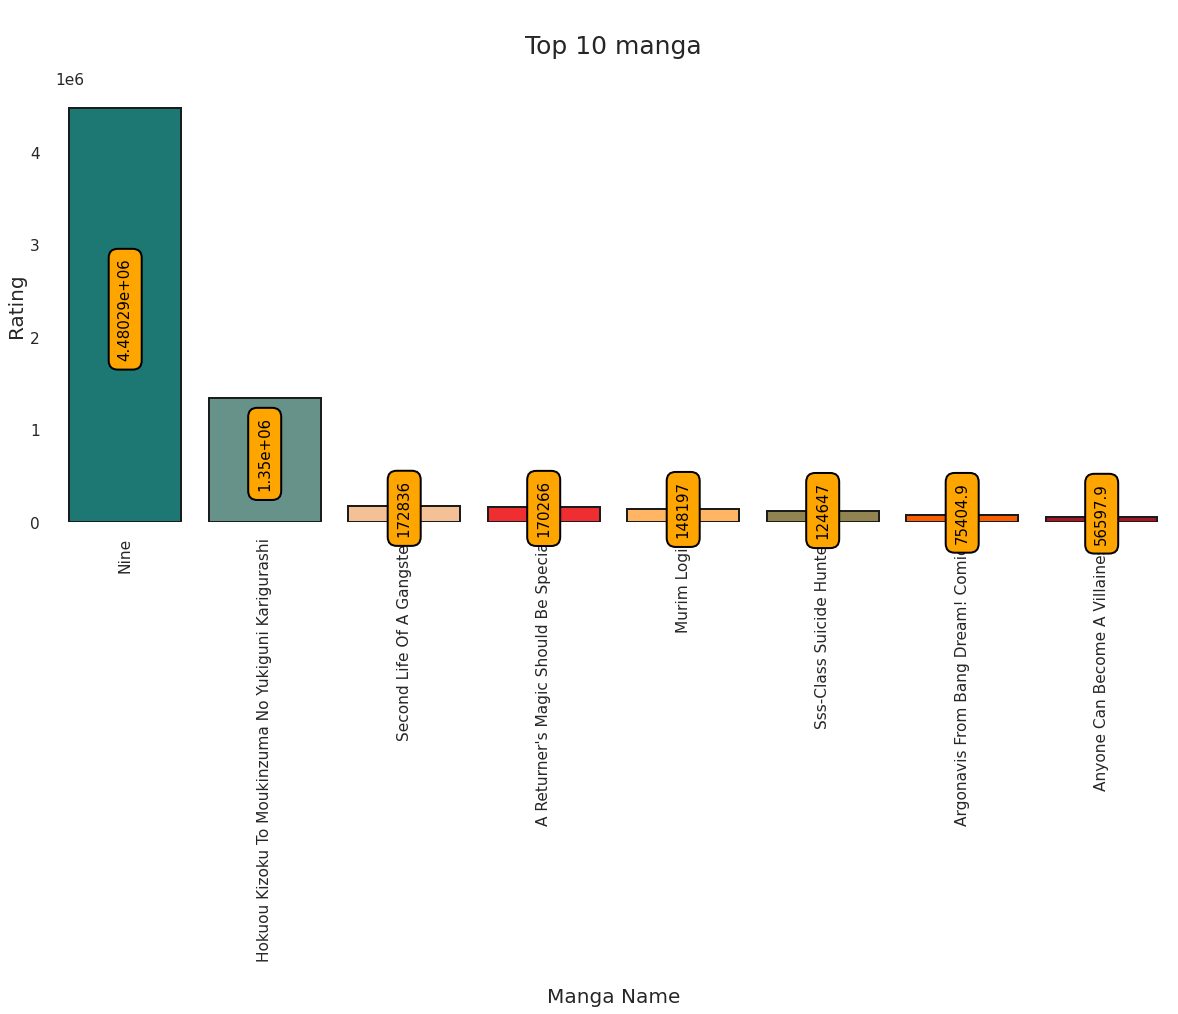

In [101]:
top_manga = df.copy()
top_manga.drop_duplicates(subset ="Name", keep = "first", inplace = True)
top_manga_temp1 = top_manga.sort_values(["Rating"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_manga_temp1["Name"][:8],y=top_manga_temp1["Rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop 10 manga\n", fontsize=25)
plt.ylabel("Rating" , fontsize = 20)
plt.xlabel("\nManga Name" , fontsize = 20)

plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

#Top Genres of mangas from dataset
counting the number of each genre

In [102]:
#the top manga genres 
print("Manga Genres :")
top_manga_temp1["Genre"].value_counts().to_frame().T

Manga Genres :


Yaoi  Comedy,Romance,School life,Shoujo  Romance,School life,Shoujo  \
Genre   254                                158                         135   

       Romance,Yaoi  Romance,Shoujo  Drama,Romance,Shoujo  \
Genre           113             101                    89   

       One shot,Romance,School life,Shoujo  \
Genre                                   88   

       Comedy,Drama,Romance,School life,Shoujo  Action,Adventure,Fantasy  \
Genre                                       87                        73   

       Drama,Romance,School life,Shoujo  ...  \
Genre                                72  ...   

       Adventure,Comedy,Fantasy,Romance,Shoujo,Supernatural,Webtoons,Manhwa  \
Genre                                                  1                      

       Action,Adventure,Comedy,Ecchi,Mature  Mature,School life,Supernatural  \
Genre                                     1                                1   

       Action,Comedy,Harem,Martial arts,Romance,Shounen  \
Genre                                                 1   

       Drama,Romance,Shounen,Sports,Tragedy  \
Genre                                     1   

       Comedy,Drama,Psychological,Romance,Shounen,Slice of life,Supernatural,Tragedy  \
Genre                                                  1                               

       Drama,Fantasy,Shounen ai,Supernatural  \
Genre                                      1   

       Action,Adventure,Martial arts,Shounen  \
Genre                                      1   

       Adult,Comedy,Romance,Seinen,Slice of life  \
Genre                                          1   

       Mystery,Psychological,Sci fi,Supernatural,Webtoons,Yaoi,Manhwa  
Genre                                                  1               

[1 rows x 6632 columns]

In [103]:
# Count number of Genre including the duplicates
from collections import Counter

genre_raw = df['Genre'].dropna().to_list()
genre_list = list()

for genres in genre_raw:
    genres = genres.split(", ")
    for g in genres:
        genre_list.append(g)
        
genre_df = pd.DataFrame.from_dict(Counter(genre_list), orient = 'index').rename(columns = {0:'Count'}).T
genre_df.head()

Romance,Shoujo,Webtoons  Comedy,Drama,Harem,Romance  Fantasy,Romance  \
Count                        6                           1               36   

       Drama,Fantasy,Historical,Romance,Shoujo,Webtoons  Drama,Romance,Shoujo  \
Count                                                 2                    89   

       Romance,School life,Shoujo  Comedy,Drama,Gender bender,Romance,Shoujo  \
Count                         135                                          3   

       Romance,Webtoons,Yaoi  Adventure,Fantasy  Comedy,Drama,Romance,Shoujo  \
Count                      4                 14                           35   

       ...  Romance,Sci fi  Adult,Drama,Historical,Yaoi,Manhwa  \
Count  ...               1                                   1   

       Fantasy,Historical,Romance,Smut,Yaoi,Manhwa  \
Count                                            1   

       Adventure,Fantasy,Slice of life  \
Count                                1   

       Action,Martial arts,Shounen,Webtoons,Manhwa  \
Count                                            1   

       Drama,Fantasy,Harem,Romance  \
Count                            1   

       Action,Adult,Adventure,Fantasy,Martial arts,Webtoons  \
Count                                                  1      

       Comedy,Psychological,Romance,Shoujo,Slice of life,Sports,Manhwa  \
Count                                                  1                 

       Action,Adventure,Comedy,Fantasy,Isekai  \
Count                                       1   

       Comedy,Drama,Fantasy,Harem,Historical,Romance,Webtoons  
Count                                                  1       

[1 rows x 6637 columns]

#Clustering Genres with K-Means
Simple K-means clustering algorithm is used to divide the genres in this dataset into ten clusters based on the features of each genres.

In [104]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = df.select_dtypes(np.number)
cluster_pipeline.fit(X)
df['cluster'] = cluster_pipeline.predict(X)

In [105]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['Genre'] = df['Genre']
projection['cluster'] = df['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'Genre'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14534 samples in 0.015s...
[t-SNE] Computed neighbors for 14534 samples in 0.772s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14534
[t-SNE] Computed conditional probabilities for sample 2000 / 14534
[t-SNE] Computed conditional probabilities for sample 3000 / 14534
[t-SNE] Computed conditional probabilities for sample 4000 / 14534
[t-SNE] Computed conditional probabilities for sample 5000 / 14534
[t-SNE] Computed conditional probabilities for sample 6000 / 14534
[t-SNE] Computed conditional probabilities for sample 7000 / 14534
[t-SNE] Computed conditional probabilities for sample 8000 / 14534
[t-SNE] Computed conditional probabilities for sample 9000 / 14534
[t-SNE] Computed conditional probabilities for sample 10000 / 14534
[t-SNE] Computed conditional probabilities for sample 11000 / 14534
[t-SNE] Computed conditional probabilities for sample 12000 / 14534
[t-SNE] Computed conditional probabilities for sam

#Manga Genre's rating

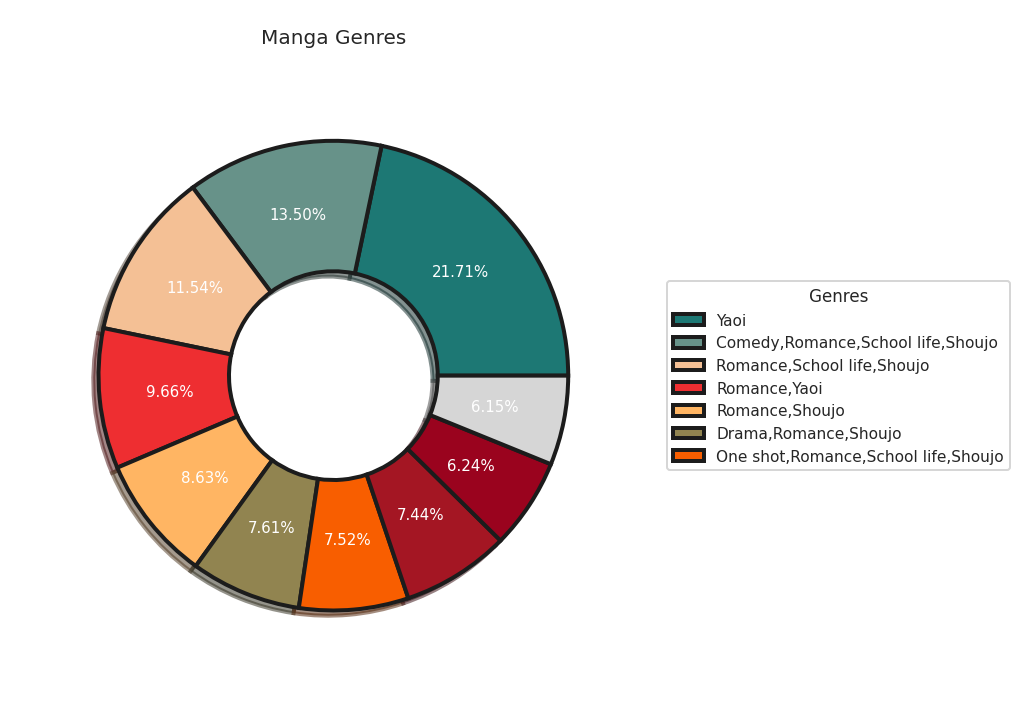

In [106]:
plt.subplots(figsize=(12, 12))

labels = "Yaoi","Comedy,Romance,School life,Shoujo","Romance,School life,Shoujo","Romance,Yaoi","Romance,Shoujo","Drama,Romance,Shoujo","One shot,Romance,School life,Shoujo",
"Comedy,Drama,Romance,School life,Shoujo","Action,Adventure,Fantasy","Drama,Romance,School life,Shoujo"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_manga_temp1[top_manga_temp1["Genre"]=="Yaoi"]["Genre"]),
                                    len(top_manga_temp1[top_manga_temp1["Genre"]=="Comedy,Romance,School life,Shoujo"]["Genre"]),
                                    len(top_manga_temp1[top_manga_temp1["Genre"]=="Romance,School life,Shoujo"]["Genre"]),
                                    len(top_manga_temp1[top_manga_temp1["Genre"]=="Romance,Yaoi"]["Genre"]),
                                    len(top_manga_temp1[top_manga_temp1["Genre"]=="Romance,Shoujo"]["Genre"]),
                                    len(top_manga_temp1[top_manga_temp1["Genre"]=="Drama,Romance,Shoujo"]["Genre"]),
                                    len(top_manga_temp1[top_manga_temp1["Genre"]=="One shot,Romance,School life,Shoujo"]["Genre"]),
                                    len(top_manga_temp1[top_manga_temp1["Genre"]=="Comedy,Drama,Romance,School life,Shoujo"]["Genre"]),
                                    len(top_manga_temp1[top_manga_temp1["Genre"]=="Action,Adventure,Fantasy"]["Genre"]),
                                    len(top_manga_temp1[top_manga_temp1["Genre"]=="Drama,Romance,School life,Shoujo"]["Genre"])],
                                    explode = (0,0,0,0,0,0,0,0,0,0),
                                    textprops=dict(size= 15, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Genres",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nManga Genres",fontsize=20)
plt.show()

#Top mangas based on Rating

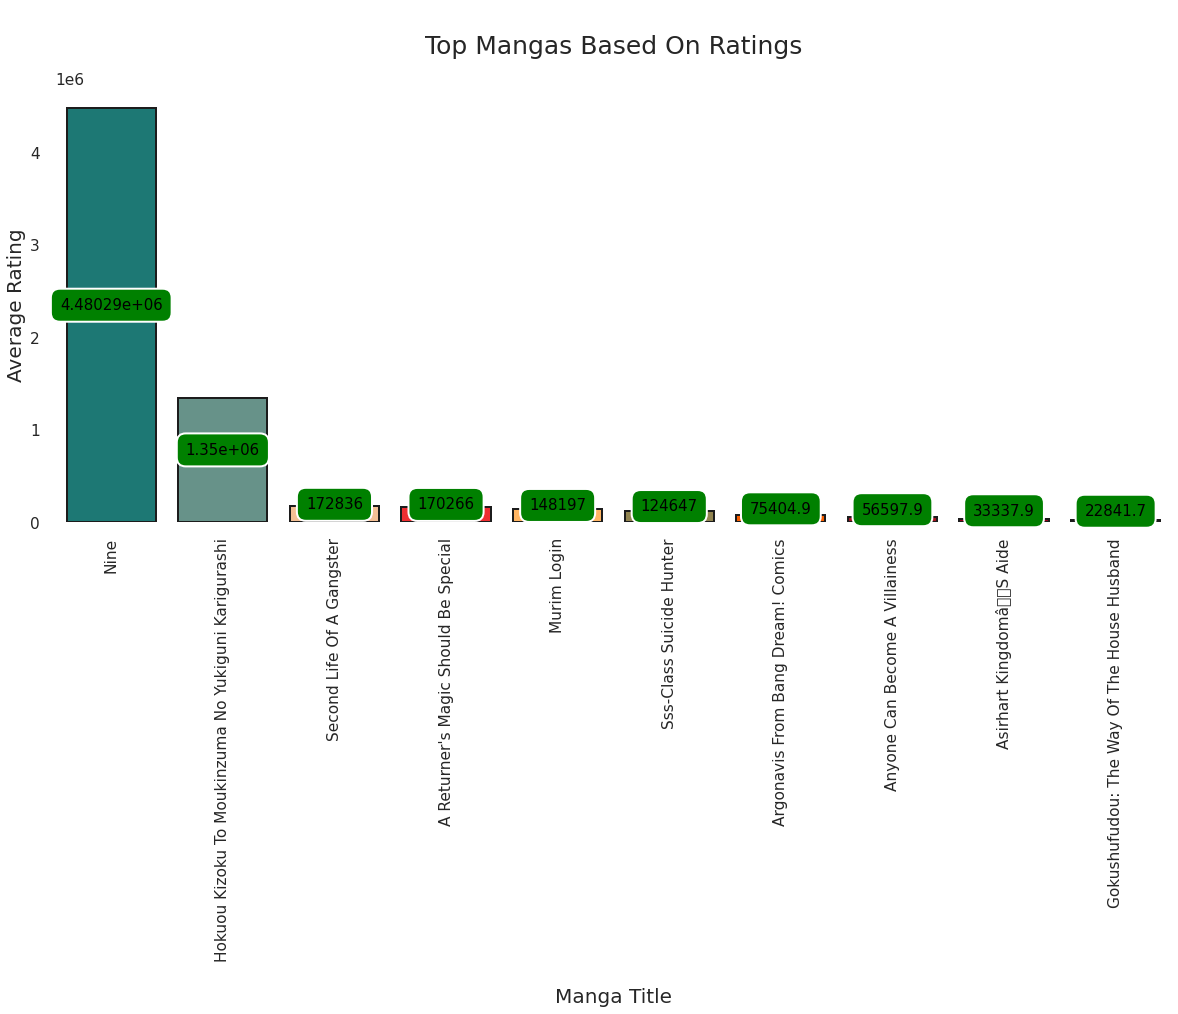

In [107]:
top_manga_temp2 = top_manga.sort_values(["Rating"],ascending=False)
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_manga_temp2["Name"][:10],y=top_manga_temp2["Rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Mangas Based On Ratings\n",fontsize = 25)
plt.ylabel("Average Rating",fontsize = 20)
plt.xlabel("\nManga Title",fontsize = 20)

plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round","pad": 0.6, "facecolor": "green", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

#Preparing the data by filling the dataset with Zeros
this will help to create sparse matrix which is helpful in finding the cosine similarity.

In [108]:
data_pivot = df.pivot_table(index="Genre",columns="Name",values="Rating").fillna(0).T
data_pivot.head()

Genre                                         Action  \
Name                                                   
 Anaerobic Love: Deep Sea Prisoner               0.0   
 Being A Substitute For PresidentâS Bride      0.0   
 Cajole A Childe Into Being My Boyfriend         0.0   
 Childe And Sweet Wife                           0.0   
 Crawling Into Me In The Middle Of The Night     0.0   

Genre                                         Action,Adult,Adventure,Comedy,Cooking,Doujinshi,Drama,Ecchi,Fantasy,Gender bender,Harem,Historical,Horror,Josei,Martial arts,Mature,Mecha,Medical,Mystery,One shot,Psychological,Romance,School life,Sci fi,Seinen,Shoujo,Shoujo ai,Shounen,Shounen ai,Slice of life,Smut,Sports,Supernatural,Tragedy,Webtoons,Yaoi,Yuri,Manhwa,Manhua,Isekai  \
Name                                                                                                                                                                                                                                                                                                                                                                                          
 Anaerobic Love: Deep Sea Prisoner                                                          0.0                                                                                                                                                                                                                                                                                               
 Being A Substitute For PresidentâS Bride                                                 0.0                                                                                                                                                                                                                                                                                               
 Cajole A Childe Into Being My Boyfriend                                                    0.0                                                                                                                                                                                                                                                                                               
 Childe And Sweet Wife                                                                      0.0                                                                                                                                                                                                                                                                                               
 Crawling Into Me In The Middle Of The Night                                                0.0                                                                                                                                                                                                                                                                                               

Genre                                         Action,Adult,Adventure,Comedy,Cooking,Doujinshi,Drama,Ecchi,Harem,Mystery,Psychological,Romance,School life,Sci fi,Shounen,Supernatural,Tragedy  \
Name                                                                                                                                                                                            
 Anaerobic Love: Deep Sea Prisoner                                                          0.0                                                                                                 
 Being A Substitute For PresidentâS Bride                                                 0.0                                                                                                 
 Cajole A Childe Into Being My Boyfriend                                                    0.0                                                          

#Using collabarative filltering
data matrix and cosine similarity

In [109]:
data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

query_no = np.random.choice(data_pivot.shape[0]) # random manga title and finding recommendation
print(f"We will find recommendation for {query_no} no manga which is {data_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

We will find recommendation for 8662 no manga which is Nettaigyo Wa Yuki Ni Kogareru.


In [110]:
number = []
Name = []
Distance = []
Rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {data_pivot.index[query_no]} readers :\n")
    else:
              
        number.append(i)
        Name.append(data_pivot.index[indices.flatten()[i]])
        Distance.append(distances.flatten()[i])
        Rating.append(*df[df["Name"]==data_pivot.index[indices.flatten()[i]]]["Rating"].values)

dic = {"No" : number, "Manga Name" : Name, "Rating" : Rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)
recommendation.style.set_properties(**{"background-color": "red","color":"white","border": "2px"})

Recommendations for Nettaigyo Wa Yuki Ni Kogareru readers :

